Use these scripts to generate the figures in the manuscript

In [15]:
import pandas as pd
from openpyxl import load_workbook
from pandas import DataFrame
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Fig 3

   counts  numbers
0       2       28
1       3        6
2       4        3
3       6        1


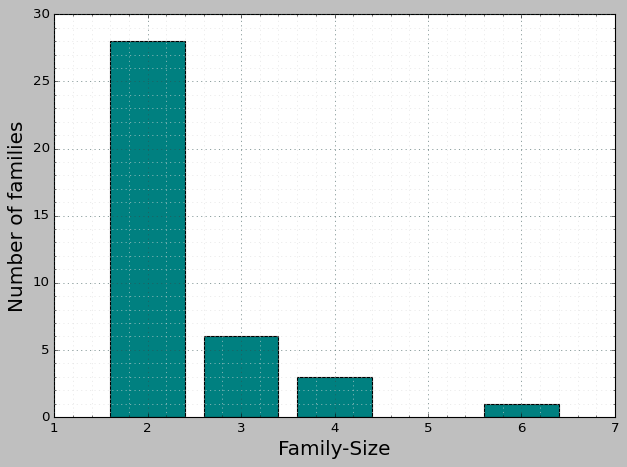

In [6]:
df = pd.ExcelFile("../Dataset.xlsx")
df.sheet_names
dfAll = df.parse("Fig3")
dfAll.columns
plt.style.use('classic')
df_fam1 = DataFrame({'count' : dfAll.groupby( ['MLV'] ).size()}).reset_index()
df_fam1['count'] = df_fam1['count'] +1
# print(df_fam1['count'].sort_values().head(10))
df22 = dfAll.groupby(['MLV']).size().reset_index(name='counts')
df22 = df22.set_index('counts')
df22 = df22.groupby(['counts']).size().reset_index(name='numbers')
df22['counts'] =df22['counts'] + 1
print(df22)
plt.xlabel('Family-Size', fontsize=18)
plt.ylabel('Number of families',fontsize=18)
plt.minorticks_on()
plt.grid(True, which='major', color='#2F4F4F')
plt.grid(True, which='minor', color='#DCDCDC')
plt.bar(df22['counts'],df22['numbers'], color='#008080')
plt.xlim(1,7)
plt.tight_layout()
plt.savefig('../img/variants.pdf')
plt.show()

Fig 4a

  Categories  counts
0   All Same      42
1  None Same      12


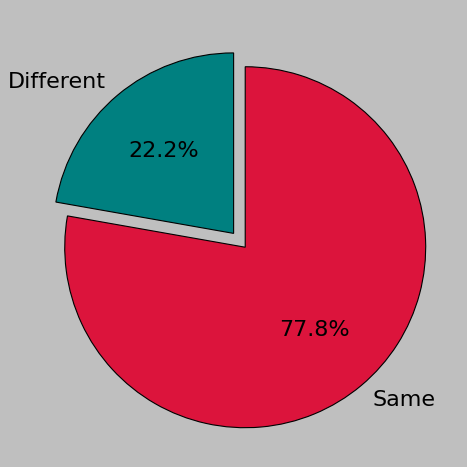

In [9]:
dfCat = pd.ExcelFile("../Dataset.xlsx")
dfCat.sheet_names

dfCatP = dfCat.parse("Fig4a")
dfCatP.columns

plt.style.use('classic')
dfCatP1 = dfCatP.groupby(['Categories']).size().reset_index(name='counts')
dfCatP1
print(dfCatP1)
plt.style.use('classic')
slices = [dfCatP1.iloc[1,1], dfCatP1.iloc[0,1]]
labels = ('Different', 'Same')
colors=['#008080','#DC143C']
explode = [0, 0.1]
plt.pie(slices, labels=labels, textprops={'fontsize': 20}, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.tight_layout()
plt.savefig('../img/CategoryPieP.pdf')
plt.show()

Fig 4b

  Categories  counts
0   All Same      27
1  None Same       8
2  Some Same       3


FileNotFoundError: [Errno 2] No such file or directory: 'img/CategoryPieF.pdf'

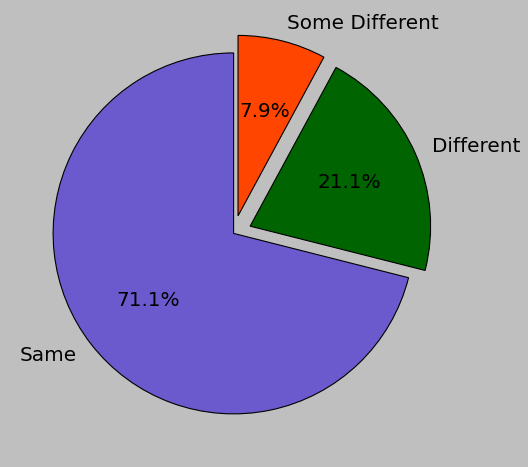

In [8]:
dfCat = pd.ExcelFile("../Dataset.xlsx")
dfCat.sheet_names

dfCatF = dfCat.parse("Fig4b")
dfCatF.columns

dfCatF1 = dfCatF.groupby(['Categories']).size().reset_index(name='counts')
dfCatF1
print(dfCatF1)
plt.style.use('classic')
slices = [dfCatF1.iloc[0,1], dfCatF1.iloc[1,1], dfCatF1.iloc[2,1]]
labels = ('Same', 'Different', 'Some Different')
colors = ['#6A5ACD', '#006400','#FF4500']
explode = [0, 0.1, 0.1]
plt.pie(slices, labels=labels, textprops={'fontsize': 18}, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.tight_layout()
plt.savefig('img/CategoryPieF.pdf')
plt.show()

Fig 5a

In [10]:
dfComp = pd.ExcelFile("Dataset.xlsx")
dfComp.sheet_names
dfComp = dfComp.parse("Fig5a")
dfComp.columns
dfComp = dfComp.groupby(['Company']).size().reset_index(name='counts')
print(dfComp)
plt.style.use('classic')
slices = [dfComp.iloc[1,1], dfComp.iloc[0,1]]
labels = ('Same', 'Different')
colors=['#4169E1','#556B2F']

explode = [0, 0.1]
plt.pie(slices, labels=labels, textprops={'fontsize': 18}, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.tight_layout()
plt.savefig('../img/devs.pdf')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset.xlsx'

Fig 5b

     Company  counts
0   All Same       3
1  None Same      31
2  Some Same       4


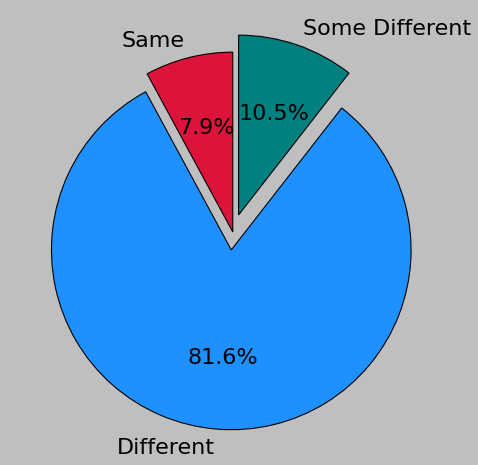

In [11]:
dfComp = pd.ExcelFile("../Dataset.xlsx")
dfComp.sheet_names
dfComp = dfComp.parse("Fig5b")
dfComp.columns
dfComp = dfComp.groupby(['Company']).size().reset_index(name='counts')
print(dfComp)

plt.style.use('classic')
slices = [dfComp.iloc[0,1], dfComp.iloc[1,1], dfComp.iloc[2,1]]
labels = ('Same', 'Different', 'Some Different')
colors = ['#DC143C', '#1E90FF','#008080']
explode = [0, 0.1, 0.1]
plt.pie(slices, labels=labels, textprops={'fontsize': 20}, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.tight_layout()
plt.savefig('../img/devsPie.pdf')
plt.show()

Fig 6a

<ipython-input-12-759f94584a3e>:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10000000)


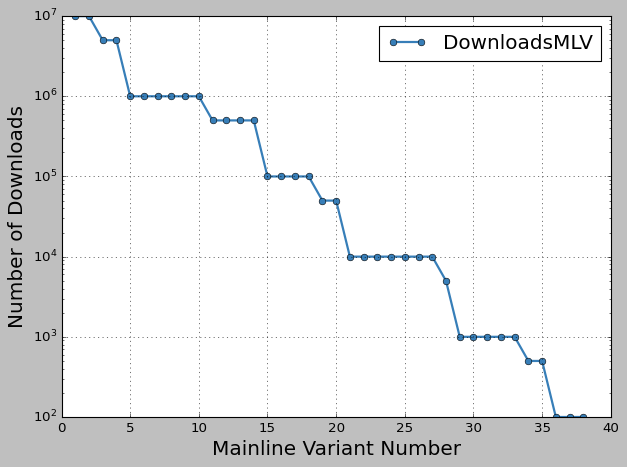

In [12]:
df = pd.ExcelFile("../Dataset.xlsx")
df.sheet_names

df = df.parse("Fig6a")
df.columns

plt.style.use('classic')
x1 = range(1,len(df['MLV'])+1)
y_d = df['Downloads'].sort_values(ascending=False)

plt.plot(x1, y_d, color='#377eb8', label='DownloadsMLV', linewidth=2, marker='o')
plt.grid(True)
plt.yscale('log')
plt.xlim(0,40)
plt.ylim(0,10000000)
plt.xlabel('Mainline Variant Number', fontsize=18)
plt.ylabel('Number of Downloads', fontsize=18)
# Put a legend below current axis
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('../img/DownsMLV.pdf')
plt.show()

Fig 6b

In [ ]:
df = pd.ExcelFile("Dataset.xlsx")
df.sheet_names

df = df.parse("Fig6b&e")
df.columns

x2 = range(1,len(dfAll['Downloads_Mainline'])+1)
y1 = dfAll['Downloads_Mainline']
y2 = dfAll['Downloads_Fork'].sort_values(ascending=False)

# plt.plot(x2, y1, color='#377eb8', label='Downloads_mainline', linewidth=2, marker='o')
plt.plot(x2, y2, color='#006400', label='DownloadsFV', linewidth=2, marker='o')
plt.yscale('log')
plt.grid(True)
plt.xlim(0,55)
plt.ylim(0,10000000)
plt.xlabel('Fork variant number', fontsize=18)
plt.ylabel('Number of Downloads', fontsize=18)
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('img/DownsFV.pdf')
plt.show()

Fig 6c

In [ ]:
df = pd.ExcelFile("Dataset.xlsx")
df.sheet_names

df = df.parse("Fig6c")
df.columns

x1 = range(1,len(df['MLV'])+1)
#y_d = df['Downloads_Mainline']
y_r = df['TotalReviewsMLV'].sort_values(ascending=False) +1
plt.plot(x1, y_r, color='#4169E1', label='ReviewsMLV', linewidth=2, marker='o')
plt.grid(True)
plt.yscale('log')
plt.ylim(0,1000000)
plt.xlabel('Mainline Variant Number', fontsize=18)
plt.ylabel('Number of Reviews', fontsize=18)
# Put a legend below current axis
plt.legend(fontsize=18, loc="upper center")

plt.tight_layout()
plt.savefig('img/ReviewsMLV.pdf')
plt.show()

Fig 6d

In [ ]:
df = pd.ExcelFile("Dataset.xlsx")
df.sheet_names

df = df.parse("Fig6d&f")
df.columns

x2 = range(1,len(df['TotalReviewsFV'])+1)
y1 = df['TotalReviewsMLV'] +0.001
y2 = df['TotalReviewsFV'].sort_values(ascending=False) +0.1

# plt.plot(x2, y1, color='#4169E1', label='Mainline Reviews', linewidth=2, marker='o')
plt.plot(x2, y2, color='#008080', label='ReviewsFV', linewidth=2, marker='o')
plt.yscale('log')
plt.grid(True)
plt.xlim(0,55)
plt.ylim(0,1000000)
plt.xlabel('Fork Variant Number', fontsize=18)
plt.ylabel('Number of Reviews', fontsize=18)
plt.legend(fontsize=18, loc="upper center")
plt.tight_layout()
plt.savefig('img/ReviewsFV.pdf')
plt.show()

Fig 6e

In [ ]:
df = pd.ExcelFile("Dataset.xlsx")
df.sheet_names

df = df.parse("Fig6b&e")
df.columns

x2 = range(1,len(dfAll['Downloads_Mainline'])+1)
dfAll = dfAll.sort_values(by = ['Downloads_Mainline'], ascending=False)
y1 = dfAll['Downloads_Mainline']
y2 = dfAll['Downloads_Fork']

plt.plot(x2, y1, color='#377eb8', label='DownloadsMLV', linewidth=2, marker='o')
plt.plot(x2, y2, color='#006400', label='DownloadsFV', linewidth=2, marker='o')
plt.yscale('log')
plt.grid(True)
plt.xlim(0,55)
plt.xlabel('Mainline-Fork Pair Number', fontsize=18)
plt.ylabel('Number of Downloads', fontsize=18)
plt.legend(fontsize=18, loc="upper right")
plt.tight_layout()
plt.savefig('img/DownsMLV-FV.pdf')
plt.show()

Fig 6f

In [ ]:
df = pd.ExcelFile("Dataset.xlsx")
df.sheet_names

df = df.parse("Fig6d&f")
df.columns

x2 = range(1,len(df['TotalReviewsFV'])+1)
df = df.sort_values(by = ['TotalReviewsMLV'], ascending=False)
y1 = df['TotalReviewsMLV']
y2 = df['TotalReviewsFV'] +0.1

plt.plot(x2, y1, color='#4169E1', label='ReviewsMLV', linewidth=2, marker='o')
plt.plot(x2, y2, color='#008080', label='ReviewsFV', linewidth=2, marker='o')
plt.yscale('log')
plt.grid(True)
plt.xlim(0,55)
plt.xlabel('Mainline-Fork Pair Number', fontsize=18)
plt.ylabel('Number of Reviews', fontsize=18)
plt.legend(fontsize=18, loc="upper center")

plt.tight_layout()
plt.savefig('img/ReviewsMLV-FV.pdf')
plt.show()

Fig 7a

In [ ]:
import seaborn as sns

dfBoxPlot = pd.ExcelFile("Dataset.xlsx")

dfBoxPlot.sheet_names

dfBoxPlot = dfBoxPlot.parse('Fig7a-7c')
dfBoxPlot.columns
labels = ['Files']
df1 = dfBoxPlot['Unique-files']

df1.columns = labels
colors = ["#e41a1c","#377eb8","#4daf4a","#984ea3", "#ff7f00", "#ffff33"]

bplot = sns.boxplot(data=df1, width=0.5)
for i in range(0,1):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i+1])

plt.yscale('log')
plt.grid(True, which='major', color='#DCDCDC')
#plt.xlabel("", fontsize=20)
plt.ylabel("Number of Files", fontsize=20)
plt.xticks([0], [''])
plt.tight_layout()
plt.savefig('img/FilesUnique.pdf')
plt.show()

Fig 7b

In [ ]:
import seaborn as sns

dfBoxPlot = pd.ExcelFile("Dataset.xlsx")

dfBoxPlot.sheet_names

dfBoxPlot = dfBoxPlot.parse('Fig7a-7c')
dfBoxPlot.columns
labels = ['Java','Layout','Resources','Manifest','Gradle','Readme','Others']
df1 = dfBoxPlot[['Java-U','Layout-U','Other_Res-U','manifest-U', 'Gradle-U' , 'readme-U', 'others-U']]

df1.columns = labels
colors = ["#e41a1c","#377eb8","#4daf4a","#984ea3", "#ff7f00", "#ffff33", "#a65628"]

bplot = sns.boxplot(x="variable", y="value", data=pd.melt(df1), width=0.8)
for i in range(0,7):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i])

plt.yscale('log')
plt.grid(True, which='major', color='#DCDCDC')
plt.xlabel("", fontsize=20)
plt.ylabel("Number of Files", fontsize=20)
plt.tight_layout()
plt.savefig('img/FileTypes.pdf')
plt.show()

Fig 7c

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
plt.style.use('classic')
# y-axis in bold
rc('font', weight='bold')
# Values of each group
dfBoxPlot = pd.ExcelFile("Dataset.xlsx")
dfBoxPlot.sheet_names

dfBoxPlot2 = dfBoxPlot.parse('Fig7a-7c')
dfBoxPlot2.columns

import pandas as pd
plt.style.use('classic')
# y-axis in bold
rc('font', weight='bold')
# Values of each group
bars1 = dfBoxPlot2['Java-U'].tolist()
bars2 = dfBoxPlot2['Layout-U'].tolist()
bars3 = dfBoxPlot2['Other_Res-U'].tolist()
bars4 = dfBoxPlot2['manifest-U'].tolist()
bars5 = dfBoxPlot2['Gradle-U'].tolist()
bars6 = dfBoxPlot2['readme-U'].tolist()
bars7 = dfBoxPlot2['others-U'].tolist()
print(len(bars4)+1)
# Heights of bars1 + bars2
N= len(bars4)
bars = np.add(bars1, bars2).tolist()

# The position of the bars on the x-axis
r = range(1,len(bars4)+1)

# Names of group and bar width
names = range(1,len(bars4)+1)
barWidth = 1
colors = ["#e41a1c","#377eb8","#4daf4a","#984ea3", "#ff7f00", "#ffff33", "#a65628"]
# Create brown bars
plt.bar(r, bars1, color=colors[0], edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color=colors[1], edgecolor='black', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color=colors[2], edgecolor='black', width=barWidth)

bars = np.add(bars, bars3).tolist()
plt.bar(r, bars4, bottom=bars, color=colors[3], edgecolor='black', width=barWidth)

bars = np.add(bars, bars4).tolist()
plt.bar(r, bars5, bottom=bars, color=colors[4], edgecolor='black', width=barWidth)

bars = np.add(bars, bars5).tolist()
plt.bar(r, bars6, bottom=bars, color=colors[5], edgecolor='black', width=barWidth)

bars = np.add(bars, bars6).tolist()
plt.bar(r, bars7, bottom=bars, color=colors[6], edgecolor='black', width=barWidth)

colors = {'Java':colors[0], 'Layout':colors[1], 'Resources':colors[2], 'Manifest':colors[3], 'Gradle':colors[4], 'Readme':colors[5], 'Others':colors[6]}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

# Custom X axis
# plt.xticks(r, names, fontweight='bold')
plt.xlim(0,55)
plt.ylim(0,1800)
plt.xticks(np.arange(0, 55, 5))
plt.xlabel("Fork variant app", fontsize=20)
plt.ylabel("Number of Files", fontsize=20)
# plt.minorticks_on()
plt.grid(True, which='major', color='#2F4F4F')
plt.grid(True, which='minor', color='#DCDCDC', linestyle='-')
plt.tight_layout()
plt.savefig('img/FilesTypes-Stacked.pdf')
plt.show()

Fig 8a

In [ ]:
import seaborn as sns

dfBoxPlot = pd.ExcelFile("Dataset.xlsx")

dfBoxPlot.sheet_names

dfBoxPlot = dfBoxPlot.parse('Fig8a-8c')
dfBoxPlot.columns
labels = ['Activities','Fragments','Providers','Services','Broadcast','Others']
df1 = dfBoxPlot[['Activities','Fragments','Providers','Services','Broadcast','Others']]

df1.columns = labels
colors = ["#e41a1c","#377eb8","#4daf4a","#984ea3", "#ff7f00", "#ffff33"]

bplot = sns.boxplot(x="variable", y="value", data=pd.melt(df1), width=0.8)
for i in range(0,6):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colors[i])

plt.yscale('log')
plt.grid(True, which='major', color='#DCDCDC')
plt.xlabel("", fontsize=20)
plt.ylabel("Number of Files", fontsize=20)
plt.tight_layout()
plt.savefig('img/Components.pdf')
plt.show()

Fig 8b

In [ ]:
import seaborn as sns

df = pd.ExcelFile("Dataset.xlsx")
df.sheet_names
df = df.parse('Fig8b')
df.columns

labels = ['Added','Modified','Removed','Renamed']
ax = (
    df.set_index('Changed', append=True)  # set E as part of the index
      .stack()                      # pull A - D into rows
      .to_frame()                   # convert to a dataframe
      .reset_index()                # make the index into reg. columns
      .rename(columns={'level_2': 'quantity', 0: 'value'})  # rename columns
      #.drop('level_0', axis='columns')   # drop junk columns
      .pipe((sns.boxplot, 'data'), x='quantity', y='value', hue='Changed', hue_order=labels)
)
plt.yscale('log')
plt.grid(True, which='major', color='#DCDCDC')
plt.ylabel("Number of Files", fontsize=20)
plt.xlabel("", fontsize=20)
sns.despine(trim=True)
# plt.ylim(0,1000)
plt.tight_layout()
plt.savefig('img/ComponentChanges.pdf')
plt.show()

Fig 8c

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
plt.style.use('classic')
# y-axis in bold
rc('font', weight='bold')
# Values of each group
dfBoxPlot = pd.ExcelFile("Dataset.xlsx")
dfBoxPlot.sheet_names

dfBoxPlot1 = dfBoxPlot.parse('Fig8a-8c')
dfBoxPlot1.columns

bars1 = dfBoxPlot1['Activities'].tolist()
bars2 = dfBoxPlot1['Fragments'].tolist()
bars3 = dfBoxPlot1['Providers'].tolist()
bars4 = dfBoxPlot1['Services'].tolist()
bars5 = dfBoxPlot1['Broadcast'].tolist()
bars6 = dfBoxPlot1['Others'].tolist()
print(len(bars4)+1)
# Heights of bars1 + bars2
N= len(bars4)
bars = np.add(bars1, bars2).tolist()

# The position of the bars on the x-axis
r = range(1,len(bars4)+1)

# Names of group and bar width
names = range(1,len(bars4)+1)
barWidth = 1
colors = ["#e41a1c","#377eb8","#4daf4a","#984ea3", "#ff7f00", "#ffff33", "#a65628"]
# Create brown bars
plt.bar(r, bars1, color=colors[0], edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color=colors[1], edgecolor='black', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color=colors[2], edgecolor='black', width=barWidth)

bars = np.add(bars, bars3).tolist()
plt.bar(r, bars4, bottom=bars, color=colors[3], edgecolor='black', width=barWidth)

bars = np.add(bars, bars4).tolist()
plt.bar(r, bars5, bottom=bars, color=colors[4], edgecolor='black', width=barWidth)

bars = np.add(bars, bars5).tolist()
plt.bar(r, bars6, bottom=bars, color=colors[5], edgecolor='black', width=barWidth)

# Custom X axis
# plt.xticks(r, names, fontweight='bold')
plt.xlim(0,55)
plt.ylim(0,1050)
plt.xticks(np.arange(0, 55, 5))
plt.xlabel("Fork variant app", fontsize=20)
plt.ylabel("Number of Files", fontsize=20)

colors = {'Activities':colors[0], 'Fragments':colors[1], 'Providers':colors[2], 'Services':colors[3], 'Broadcast':colors[4], 'Others':colors[5]}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
# plt.minorticks_on()
plt.grid(True, which='major', color='#2F4F4F')
plt.grid(True, which='minor', color='#DCDCDC', linestyle='-')
plt.tight_layout()
plt.savefig('img/Components-Stacked.pdf')
plt.show()

Fig 9

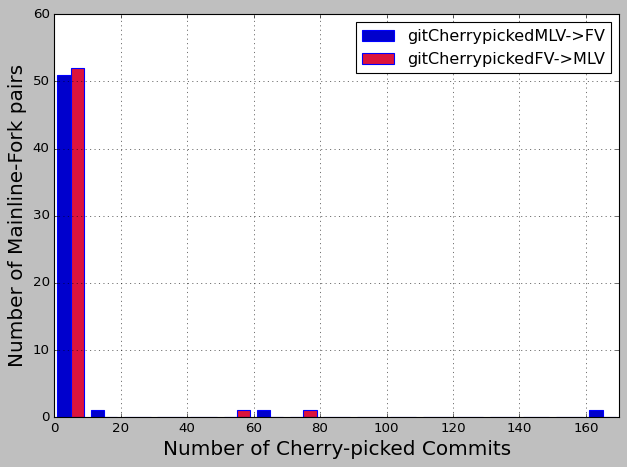

In [13]:
plt.style.use('classic')
df = pd.ExcelFile("../Dataset.xlsx")
df.sheet_names
df = df.parse('Fig9')
df.columns

y1 = df['CherryMlV']
y2 = df['CherryFV']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
plt.hist((y1,y2), bins=bins, edgecolor='b', label=('gitCherrypickedMLV->FV','gitCherrypickedFV->MLV' ), color=('#0000CD', '#DC143C'))
plt.xlim(0,170)
plt.grid(True)
plt.legend()
plt.ylabel('Number of Mainline-Fork pairs', fontsize=18)
plt.xlabel('Number of Cherry-picked Commits', fontsize=18)
plt.yticks(np.arange(0, 66, 10))
# plt.yscale('log')
# plt.xticks((0.25, 0.75), (0, 1))
plt.tight_layout()
plt.savefig('../img/gitCherrypick.pdf')

Fig 10

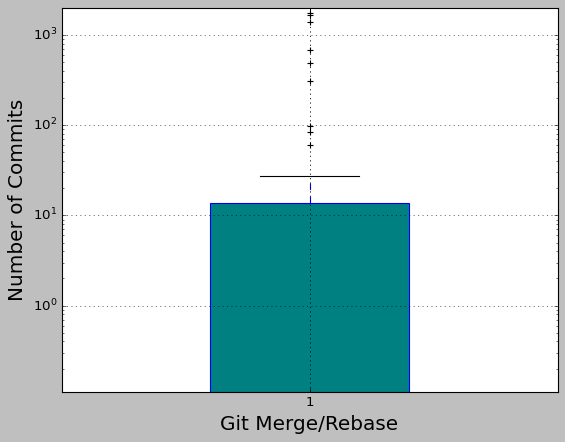

<Figure size 640x480 with 0 Axes>

In [21]:
df = pd.ExcelFile("../Dataset.xlsx")
df.sheet_names

df = df.parse("Fig10")
df.columns

plt.style.use('classic')
x2 = range(1,len(df['MLV'])+1)
y1 = df['gitPullMlv_Fv']+0.1
plt.ylim(0.11,2000)
plt.xticks([1], [''])
plt.grid(True)
plt.boxplot(y1, widths=0.4, patch_artist=True, boxprops=dict(facecolor='#008080'))
plt.yscale('log')

# plt.xscale('log')

plt.xlabel('Git Merge/Rebase', fontsize=18)
plt.ylabel('Number of Commits', fontsize=18)

plt.show()
plt.savefig('../img/gitPull.pdf')

Fig 11

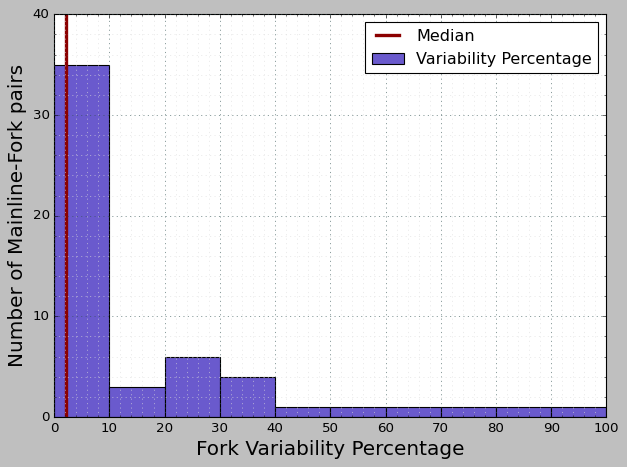

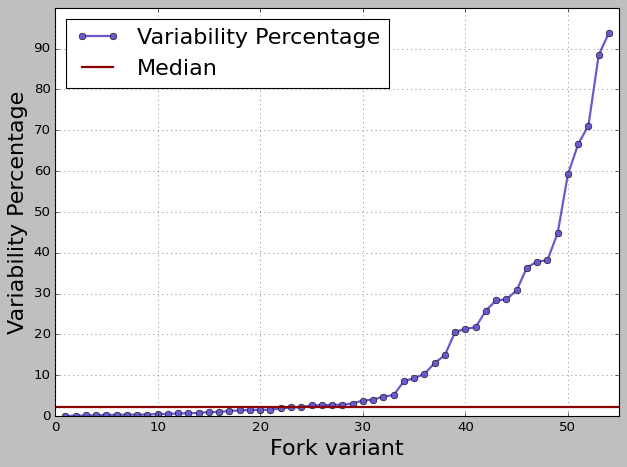

In [22]:
plt.style.use('classic')
df = pd.ExcelFile("../Dataset.xlsx")
df.sheet_names

df = df.parse("Fig11")
df.columns

y1 = df['VariabilityPercentage']
fig, ax = plt.subplots()
# ax.set_yscale('log', basey=2)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(y1, bins=bins, edgecolor='black', label='Variability Percentage', color='#6A5ACD')
plt.xlim(0,100)
plt.minorticks_on()
plt.grid(True, which='major', color='#2F4F4F')
plt.grid(True, which='minor', color='#DCDCDC')

median = 2.1
color = '#8B0000'
plt.axvline(median, color=color, label = 'Median', linewidth=3)
plt.ylabel('Number of Mainline-Fork pairs', fontsize=18)
plt.xlabel('Fork Variability Percentage', fontsize=18)
plt.yticks(np.arange(0, 50, 10))
plt.xticks(np.arange(0, 101, 10))
plt.legend()
plt.tight_layout()
# plt.savefig('img/variability.pdf')
plt.show()

y1 = y1.sort_values()
x1 = range(1,len(df['VariabilityPercentage'])+1)
plt.plot(x1, y1, color='#6A5ACD', linewidth=2, marker='o', label='Variability Percentage')
plt.xlim(0,55)
plt.ylim(0,100)
plt.axhline(median, color=color, label = 'Median', linewidth=2)
plt.yticks(np.arange(0, 100, 10))
plt.xlabel('Fork variant', fontsize=20)
plt.ylabel('Variability Percentage', fontsize=20)
plt.legend(fontsize=20, loc="upper left")
plt.grid(True, which='major', color='#2F4F4F')
plt.grid(True, which='minor', color='#DCDCDC', linestyle='-')
plt.tight_layout()
# plt.savefig('img/variability1.pdf')
plt.show()